<a href="https://colab.research.google.com/github/bhawna759/LLM-workshops-2024/blob/main/Demo_1_Solutions_pdf_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solutions for Missing Content in RAG

Here we will explore the following strategies

- Better Data Cleaning
- Better Prompting
- Agentic RAG with Tools


## Exploring Useful Data Loaders

#### Install OpenAI, HuggingFace and LangChain dependencies

In [1]:
!pip install langchain
!pip install langchain-openai
!pip install langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.5/391.5 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.4/362.4 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
# takes 2 - 5 mins to install on Colab
!pip install "unstructured[all-docs]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 42.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cache

In [1]:
# install OCR dependencies for unstructured
!sudo apt-get install tesseract-ocr
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,186 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

#### PDF Loaders

[Portable Document Format (PDF)](https://en.wikipedia.org/wiki/PDF), standardized as ISO 32000, is a file format developed by Adobe in 1992 to present documents, including text formatting and images, in a manner independent of application software, hardware, and operating systems.

LangChain integrates with a host of PDF parsers. Some are simple and relatively low-level; others will support OCR and image-processing, or perform advanced document layout analysis. The right choice will depend on your use-case and through experimentation.

Here we will see how to load PDF documents into the LangChain `Document` format

We download a research paper to experiment with

If the following command fails you can download the paper manually by going to http://arxiv.org/pdf/2103.15348.pdf, save it as `layoutparser_paper.pdf`and upload it on the left in Colab from the upload files option

In [6]:
!wget -O 'layoutparser_paper.jpeg' 'https://cdn.slidesharecdn.com/ss_thumbnails/stagesofapipeline-130909234724--thumbnail-4.jpg?cb=1378770468'

--2024-08-18 14:52:01--  https://cdn.slidesharecdn.com/ss_thumbnails/stagesofapipeline-130909234724--thumbnail-4.jpg?cb=1378770468
Resolving cdn.slidesharecdn.com (cdn.slidesharecdn.com)... 151.101.2.152, 151.101.66.152, 151.101.130.152, ...
Connecting to cdn.slidesharecdn.com (cdn.slidesharecdn.com)|151.101.2.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45035 (44K) [image/jpeg]
Saving to: ‘layoutparser_paper.jpeg’

layoutparser_paper. 100%[===================>]  43.98K  --.-KB/s    in 0.005s  

2024-08-18 14:52:01 (9.26 MB/s) - ‘layoutparser_paper.jpeg’ saved [45035/45035]



#### UnstructuredPDFLoader

[Unstructured.io](https://unstructured-io.github.io/unstructured/) supports a common interface for working with unstructured or semi-structured file formats, such as Markdown or PDF. LangChain's [`UnstructuredPDFLoader`](https://api.python.langchain.com/en/latest/document_loaders/langchain_community.document_loaders.pdf.UnstructuredPDFLoader.html) integrates with Unstructured to parse PDF documents into LangChain [`Document`](https://api.python.langchain.com/en/latest/documents/langchain_core.documents.base.Document.html) objects.

In [3]:
from langchain_community.document_loaders import UnstructuredPDFLoader

Load PDF with complex parsing, table detection and chunking by sections

In [9]:
# takes 3-4 mins on Colab
loader = UnstructuredPDFLoader('./test_pdf.pdf',
                               strategy='hi_res',
                               extract_images_in_pdf=True,
                               infer_table_structure=True,
                               chunking_strategy="by_title", # section-based chunking
                               max_characters=4000, # max size of chunks
                               new_after_n_chars=3800, # preferred size of chunks
                               combine_text_under_n_chars=2000, # smaller chunks < 2000 chars will be combined into a larger chunk
                               mode='elements')
data = loader.load()

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [10]:
len(data)

1

In [11]:
[doc.metadata['category'] for doc in data]

['CompositeElement']

In [12]:
data[0]

Document(metadata={'source': './test_pdf.pdf', 'filetype': 'application/pdf', 'languages': ['eng'], 'last_modified': '2024-08-18T14:55:49', 'page_number': 1, 'orig_elements': 'eJy9VW1v2zYQ/isXfekGmKooUW8pUCAv+zBgbb0m7ZckMCjxZHORRcGi7AZN89t3pJzAWNNhKJBBhqV7eA/v7jmedPU1wBbX2NmFVsExBHkusJIiZRiriokmKhlZDatLmeYqr3gW8WAGwRqtVNJK4nwNamM2SnfS4uDtVt6Z0S5WqJcrSwjPUkGcPbzTyq4IjZOkJLQ3urOOd3WVCx7mM0iyOIxuZvBoizSZbJ6WRZg8A0wMQoLhbrC4dpXM9RdsL3pZY/CNFhRarK023aJu5TAs+o2pyC0KhYhKl12jW7R3PXru/F3gE+6Wo1z6qq4C7JbBjUcHu1gbpRuNXrM4igWLCsaLSy6O0/RYlI7dE3PRjesKN04Dl4TFL06P4MK6XcE0IGGue2x1h47yGP9S29an/c/2lFI0edlUrORZwkRZ5KxMEsWSJi5kSb9KqRdrT1KKMJoB53Exyf8EZGIChPgR4Cn/2qD/U/8QqANW1/9Jc5mJrCyijKUqV0wo1bAqzySL6ohj1WAmkubFNBdpGpJjmkVh7gWdbB5HZVj6EShF4kbge2Ti/NxQFLkQ/Pmm6LXTtZc+4eB1bTpLWr1u9HLc4LC/M854+Fe/fNEuXiKVtYH5xqixtvBh15H1oceNdCUNcD1GkYwhgbMV1rdMd4TEEa/nY9v6JwWno24VuI1Adupgfb9CfTDTn/f5rdvCSU8qbfExLEWCz4gWUOKv8IfGbnI9WP5I50kOCGcUQtMJQdB0vYI/RxwRjvf3V/AAob/OzLon3d/APZxj395Zc45b7LYOeCfpab+jqw9LypnH8QzeeGdD3i4+

In [13]:
print(data[0].page_content)

Stages of a Pipeline

. Static

Tester Product Owner Operations ¢ 3 Check-in “Pull” Build Test and “Pull Build into into Test Env Approve Production Veet eae) Lien Test Production Release Candidate i i ' Queue : Queue ' ~ . . . Compile; | DeplytoDevenv; | Maven Releasé™, ; DeploytoTestEnv! | Deployto Production | | Unt Test | | acceptanceTests | ~ RedploytoDev, User Acceptance Testing \— ! Smoke Tests (~~ Code Analysis > ~ , Smoke Test >~ 4 Approve Release Candidate | , integration Test : Publish Documentation | ’ Package Binaries Promote Release Candidate !

Tapu Saha | www.PortfolioDesk. Blogspot.com


In [18]:
data[0]

Document(metadata={'source': './test_pdf.pdf', 'filetype': 'application/pdf', 'languages': ['eng'], 'last_modified': '2024-08-18T14:55:49', 'page_number': 1, 'orig_elements': 'eJy9VW1v2zYQ/isXfekGmKooUW8pUCAv+zBgbb0m7ZckMCjxZHORRcGi7AZN89t3pJzAWNNhKJBBhqV7eA/v7jmedPU1wBbX2NmFVsExBHkusJIiZRiriokmKhlZDatLmeYqr3gW8WAGwRqtVNJK4nwNamM2SnfS4uDtVt6Z0S5WqJcrSwjPUkGcPbzTyq4IjZOkJLQ3urOOd3WVCx7mM0iyOIxuZvBoizSZbJ6WRZg8A0wMQoLhbrC4dpXM9RdsL3pZY/CNFhRarK023aJu5TAs+o2pyC0KhYhKl12jW7R3PXru/F3gE+6Wo1z6qq4C7JbBjUcHu1gbpRuNXrM4igWLCsaLSy6O0/RYlI7dE3PRjesKN04Dl4TFL06P4MK6XcE0IGGue2x1h47yGP9S29an/c/2lFI0edlUrORZwkRZ5KxMEsWSJi5kSb9KqRdrT1KKMJoB53Exyf8EZGIChPgR4Cn/2qD/U/8QqANW1/9Jc5mJrCyijKUqV0wo1bAqzySL6ohj1WAmkubFNBdpGpJjmkVh7gWdbB5HZVj6EShF4kbge2Ti/NxQFLkQ/Pmm6LXTtZc+4eB1bTpLWr1u9HLc4LC/M854+Fe/fNEuXiKVtYH5xqixtvBh15H1oceNdCUNcD1GkYwhgbMV1rdMd4TEEa/nY9v6JwWno24VuI1Adupgfb9CfTDTn/f5rdvCSU8qbfExLEWCz4gWUOKv8IfGbnI9WP5I50kOCGcUQtMJQdB0vYI/RxwRjvf3V/AAob/OzLon3d/APZxj395Zc45b7LYOeCfpab+jqw9LypnH8QzeeGdD3i4+

In [15]:
data[0].page_content

"Stages of a Pipeline\n\n. Static\n\nTester Product Owner Operations ¢ 3 Check-in “Pull” Build Test and “Pull Build into into Test Env Approve Production Veet eae) Lien Test Production Release Candidate i i ' Queue : Queue ' ~ . . . Compile; | DeplytoDevenv; | Maven Releasé™, ; DeploytoTestEnv! | Deployto Production | | Unt Test | | acceptanceTests | ~ RedploytoDev, User Acceptance Testing \\— ! Smoke Tests (~~ Code Analysis > ~ , Smoke Test >~ 4 Approve Release Candidate | , integration Test : Publish Documentation | ’ Package Binaries Promote Release Candidate !\n\nTapu Saha | www.PortfolioDesk. Blogspot.com"

In [20]:
from IPython.display import HTML

HTML(data[0].metadata['orig_elements'])

In [21]:
! ls -l ./figures

total 68
-rw-r--r-- 1 root root 68885 Aug 18 14:56 figure-1-1.jpg


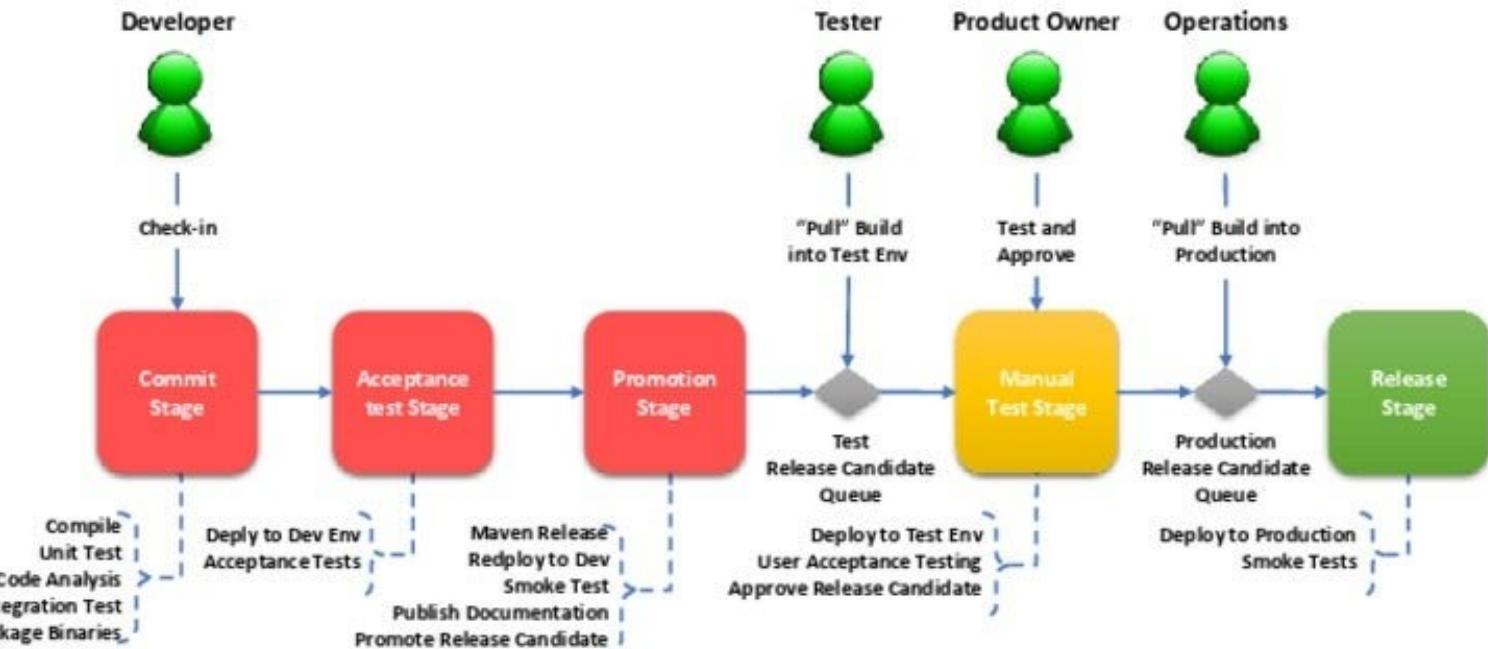

In [23]:
from IPython.display import Image

Image('./figures/figure-1-1.jpg')

## Better Prompting for Consistent Results

#### Enter Open AI API Key

In [ ]:
from getpass import getpass

OPENAI_KEY = getpass('Enter Open AI API Key: ')

Enter Open AI API Key: ··········


In [ ]:
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY

#### Load Connection to LLM

Here we create a connection to ChatGPT to use later in our chains

In [ ]:
from langchain_openai import ChatOpenAI

chatgpt = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0)

#### Problematic RAG Prompt

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

prompt = """You are an assistant for question-answering tasks.
            Give an answer to the following question with the context provided

            Question:
            {question}

            Context:
            {context}

            Answer:
         """

prompt_template = ChatPromptTemplate.from_template(prompt)

In [ ]:
context = """
The cricket world cup champion of 2023 is Australia

The cricket Twenty20 International champion of 2024 is India
"""

question = "Who is the euro 2020 champion?"

qa_rag_chain = (
    prompt_template
      |
    chatgpt
)

In [ ]:
response = qa_rag_chain.invoke({'context': context, 'question': question})
print(response.content)

The euro 2020 champion is Italy.


#### Better RAG Prompt

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

prompt = """You are an assistant for question-answering tasks.
            Use the following pieces of retrieved context to answer the question.
            If no context is present or if you don't know the answer, just say that you don't know.
            Do not make up the answer unless it is there in the provided context.

            Question:
            {question}

            Context:
            {context}

            Answer:
         """

prompt_template = ChatPromptTemplate.from_template(prompt)

In [ ]:
qa_rag_chain = (
    prompt_template
      |
    chatgpt
)

In [ ]:
response = qa_rag_chain.invoke({'context': context, 'question': question})
print(response.content)

I don't know.


## Agentic RAG with Tools

What is an Agent?

LLM + Prompts + Tools

Prompts instruct the LLM to understand which tools to call to solve specific problems.

However tool calls need to be done separately

#### Enter Tavily Search Tool API Key

Get a free API key from [here](https://tavily.com/#api)

In [ ]:
TAVILY_API_KEY = getpass('Enter Tavily Search API Key: ')

Enter Tavily Search API Key: ··········


In [ ]:
os.environ['TAVILY_API_KEY'] = TAVILY_API_KEY

#### Setup Search Tool

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.tools import tool
import rich

@tool
def search_web(query: str) -> list:
    """Search the web for a query."""
    tavily_tool = TavilySearchResults(max_results=3,
                                      search_depth='advanced',
                                      max_tokens=10000)
    results = tavily_tool.invoke(query)
    return [doc['content'] for doc in results]

In [ ]:
question

'Who is the euro 2020 champion?'

In [ ]:
search_web(question)

["Italy are the champions of Europe. On Saturday in the Euro 2020 final, the Italians defeated England in a penalty shootout to become the undisputed kings of the continent. The win is Italy's ...",
 "The UEFA Euro 2020 final was an association football match between Italy and England that took place at Wembley Stadium in London, England, on 11 July 2021 to determine the winner of UEFA Euro 2020.It was the 16th final of the UEFA European Championship, a quadrennial tournament contested by the senior men's national teams of the member associations of UEFA to decide the champions of Europe.",
 "The 2020 UEFA European Football Championship, commonly referred to as UEFA Euro 2020 or simply Euro 2020, was the 16th UEFA European Championship, the quadrennial international men's football championship of Europe organised by the Union of European Football Associations (UEFA). To celebrate the 60th anniversary of the European Championship competition, UEFA president Michel Platini declared ..."]

#### Bind Tools to LLM

In [ ]:
tools = [search_web]
chatgpt = ChatOpenAI(model_name='gpt-4o-mini', temperature=0)
chatgpt_with_tools = chatgpt.bind_tools(tools)

#### Better RAG Prompt with Tool Calling

In [ ]:
prompt = """You are an assistant for question-answering tasks.
            Use the following pieces of retrieved context to answer the question.
            If no context is present or if you don't know the answer,
            check and see if you can use the tools available to you to get the answer.

            Question:
            {question}

            Context:
            {context}

            Answer:
         """

prompt_template = ChatPromptTemplate.from_template(prompt)

qa_rag_chain = (
    prompt_template
      |
    chatgpt_with_tools
)

In [ ]:
context = """
The cricket world cup champion of 2023 is Australia

The cricket Twenty20 International champion of 2024 is India
"""

question = "Who is the euro 2020 champion?"

qa_rag_chain.invoke({'context': context, 'question': question})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_QN6XQaX2He2mknR9kKvnXz49', 'function': {'arguments': '{"query":"Euro 2020 champion"}', 'name': 'search_web'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 146, 'total_tokens': 164}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_611b667b19', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-28ca4691-01cd-4859-972d-88c3cccbd1ea-0', tool_calls=[{'name': 'search_web', 'args': {'query': 'Euro 2020 champion'}, 'id': 'call_QN6XQaX2He2mknR9kKvnXz49', 'type': 'tool_call'}], usage_metadata={'input_tokens': 146, 'output_tokens': 18, 'total_tokens': 164})

In [ ]:
question = "Who is the T20 2024 champion?"

qa_rag_chain.invoke({'context': context, 'question': question})

AIMessage(content='The T20 2024 champion is India.', response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 147, 'total_tokens': 158}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_ba606877f9', 'finish_reason': 'stop', 'logprobs': None}, id='run-fbf2b8da-b724-40ea-9af1-16484b0ae0b1-0', usage_metadata={'input_tokens': 147, 'output_tokens': 11, 'total_tokens': 158})

#### Simple Agentic RAG with Tool Calls

In [ ]:
def agentic_rag(question, context):
  tool_call_map = {'search_web' : search_web}
  response = qa_rag_chain.invoke({'context': context, 'question': question})

  # if response content is present then we have our answer
  if response.content:
    print('Answer is in retrieved context')
    answer = response.content

  # if no response content present then call search tool
  elif response.tool_calls:
    print('Answer not in context, trying to use tools')
    tool_call = response.tool_calls[0]
    selected_tool = tool_call_map[tool_call["name"].lower()]
    print(f"Calling tool: {tool_call['name']}")
    tool_output = selected_tool.invoke(tool_call["args"])
    context = '\n\n'.join(tool_output)
    response = qa_rag_chain.invoke({'context': context, 'question': question})
    answer = response.content

  # no answer found from web search also
  else:
    answer = 'No answer found'

  print(answer)

In [ ]:
context = """
The cricket world cup champion of 2023 is Australia

The cricket Twenty20 International champion of 2024 is India
"""

question = "Who is the T20 2024 champion?"

agentic_rag(question, context)

Answer is in retrieved context
The T20 2024 champion is India.


In [ ]:
question = "Who is the euro 2024 champion?"

agentic_rag(question, context)

Answer not in context, trying to use tools
Calling tool: search_web
Spain is the Euro 2024 champion, having won their fourth European Championship by defeating England 2-1 in the final held in Berlin.
